### Predicting Smoking Status using Bio-signals

---

**Author:**  
- BOUZID Atef

**Supervised by:** Mr. Messaoud Amor


# Problem statement

Smoking is a well-established cause of various health issues and is a leading contributor to preventable diseases and deaths worldwide. It is projected that smoking-related deaths will reach 10 million by 2030. Efforts have been made to help people quit smoking, but success rates are relatively low, partly due to the complexity of factors influencing smoking cessation.

To improve the effectiveness of smoking cessation, let us use ML to predict better. Our aim is to create a model that can predict an individual's smoking status using bio-signals. This model would consider various factors such as nicotine dependence, carbon monoxide levels, daily cigarette consumption, age of smoking initiation, previous quit attempts, emotional well-being, personality traits, and motivation to quit. By developing such a predictive model, healthcare professionals and patients can better understand the likelihood of successfully quitting smoking. This approach holds promise for improving smoking cessation outcomes.

# Requirements 

In [179]:
%%capture 
!pip install xgboost
!pip install catboost
!pip install lightgbm
!pip install seaborn tabulate scikit-learn

# Importing Necessary Libraries

In [180]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Mathematical functions
import math

# Tabular display
from tabulate import tabulate

# Statistical analysis
from scipy.stats import skew, kurtosis, f_oneway, chi2_contingency

# Clustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from sklearn.cluster import KMeans

# Displaying images
from IPython.display import Image

# Model evaluation and selection
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay,classification_report,roc_auc_score

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Dimensionality reduction
from sklearn.decomposition import PCA

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [181]:
sns.set_style("darkgrid")
# Set the color palette
sns.set_palette("Set1")
color_palette=sns.set_palette("Set1")
sns.color_palette()

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

# About Data

In [182]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [183]:
train.shape

(159256, 24)

In [184]:
test.shape

(106171, 23)

In [185]:
train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [186]:
train.dtypes

id                       int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

**All features are numerical**

In [187]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.306626,11.842286,20.0,40.00,40.0,55.00,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.00,165.0,170.00,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.00,65.0,75.00,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.00,83.0,89.00,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.80,1.0,1.20,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.80,1.0,1.20,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.00,1.0,1.00,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.00,1.0,1.00,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.00,121.0,130.00,213.0


### Check Null Values / Uniqueness / Missing Values

**Purpose**: The purpose of this function is to generate a summary of a DataFrame including data types, missing value counts, missing value percentages, unique value counts, and total counts for each column. The function returns a DataFrame summarizing these statistics. This summary helps in assessing the quality of the data and identifying potential issues such as missing values.

In [188]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing count'] = df.isna().sum()
    sum['missing percentage%'] = (df.isna().sum())/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    return sum

summary(train).style.background_gradient()

,dtypes,missing count,missing percentage%,uniques,count
id,int64,0,0.000000,159256,159256
age,int64,0,0.000000,18,159256
height(cm),int64,0,0.000000,14,159256
weight(kg),int64,0,0.000000,28,159256
waist(cm),float64,0,0.000000,531,159256
eyesight(left),float64,0,0.000000,20,159256
eyesight(right),float64,0,0.000000,17,159256
hearing(left),int64,0,0.000000,2,159256
hearing(right),int64,0,0.000000,2,159256
systolic,int64,0,0.000000,112,159256


# Data Summary:
- Total Number of Variables: 24

### Data Types:
- Float64: 6 (waist, eyesight(left), eyesight(right), hemoglobin, serum creatinine)
- Int64: 18 (All other variables including the target 'smoking')

### Missing Values:
- None (All variables have 0 missing values)

### Target Variable:
- 'smoking' (Binary: 0 or 1)

---

# Features Overview:

- **id**: Unique identifier for each data point.
  
- **age**: Age of the individual, categorized in 5-year intervals.
  
- **height(cm)**: Height of the individual in centimeters.
  
- **weight(kg)**: Weight of the individual in kilograms.
  
- **waist(cm)**: Waist circumference of the individual in centimeters.

- **eyesight(left/right)**: Eyesight measurements for the left and right eyes.
  
- **hearing(left/right)**: Hearing ability for the left and right ears, represented as binary.
  
- **systolic**: Systolic blood pressure measurement.
  
- **relaxation**: Diastolic blood pressure measurement.
  
- **fasting blood sugar**: Fasting blood sugar level.
  
- **Cholesterol**: Total cholesterol level.
  
- **triglyceride**: Triglyceride level.
  
- **HDL**: High-density lipoprotein cholesterol level.
  
- **LDL**: Low-density lipoprotein cholesterol level.
  
- **hemoglobin**: Hemoglobin level in the blood.
  
- **Urine protein**: Level of protein in urine, categorized.
  
- **serum creatinine**: Serum creatinine level.
  
- **AST**: Level of aspartate aminotransferase enzyme.
  
- **ALT**: Level of alanine aminotransferase enzyme.
  
- **Gtp**: Level of gamma-glutamyl transferase enzyme.
  
- **dental caries**: Presence (1) or absence (0) of dental cavities.
  
- **smoking**: Target variable indicating if the individual is a smoker (1) or not (0).

---

## Important Notes:

- There are no missing values in the dataset, so you don't have to consider imputation methods.
- The target variable is 'smoking' which is binary. This indicates whether the individual smokes or not.
er the individual smokes or not.

### Hypotheses

**Age:**

- **H0:** There is no significant difference in the life expectancy between smokers and non-smokers.
- **H1:** Non-smokers have a higher life expectancy compared to smokers.

**BMI (Body Mass Index):**

- **H0:** There is no association between BMI and smoking status.
- **H1:** There is a significant association between BMI and smoking status.

**Impact of Blood Pressure on Smoking Status (Systolic and Diastolic):**

- **H0:** There is no significant difference in blood pressure measurements between smokers and non-smokers.
- **H1:** Smokers have significantly different blood pressure measurements compared to non-smokers.

**Relationship between Cholesterol Levels and Smoking Status:**

- **H0:** There is no difference in cholesterol levels (total cholesterol, HDL, LDL, triglycerides) between smokers and non-smokers.
- **H1:** Cholesterol levels differ significantly between smokers and non-smokers.

**Dental Caries:**

- **H0:** There is no association between the presence of dental caries and smoking status.
- **H1:** Individuals who smoke are more likely to have dental caries compared to non-smokers.

**Effect of Liver Enzyme Levels on Smoking Status:**

- **H0:** There is no difference in liver enzyme levels (AST, ALT, Gtp) between smokers and non-smokers.
- **H1:** Liver enzyme levels vary significantly between smokers and non-smokers.

**Impact of Hemoglobin Level on Smoking Status:**

- **H0:** There is no difference in hemoglobin levels between smokers and non-smokers.
- **H1:** Hemoglobin levels differ significantly between smokers and non-smokers.


# Selecting necessary columns 

In [189]:
# Drop Ignored columns 
ignored_cols = ['id']
train.drop(columns=ignored_cols, inplace=True)
test.drop(columns=ignored_cols, inplace=True)

# Univariate

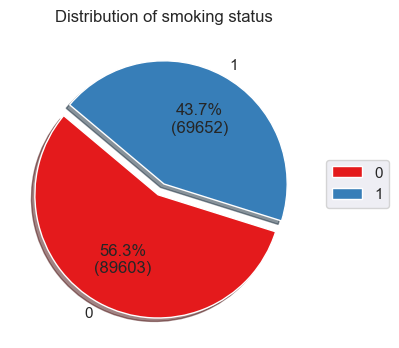

In [190]:
# More fancy pie plot
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

Uniq_vals = train['smoking'].value_counts().values
LABELS = train['smoking'].value_counts().index

fig, ax = plt.subplots(figsize =(6, 4))
ax.pie(Uniq_vals, 
       labels=LABELS, 
       autopct=lambda pct: func(pct, Uniq_vals), 
       shadow=True, 
       explode=(0.1, 0), 
       startangle=140)

ax.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Distribution of smoking status')
plt.show()

### Plots Utilized:

**Continuous Features:**
*In this section, I will assess skewness and kurtosis![](https://www.bookmyessay.com/wp-content/uploads/2018/10/Skewness-and-Kurtosis.png).="">

- Histogram with Kernel Density Estimation (KDE):   It combines the benefits of a histogram, which provides a discrete representation of data distribution through bins, and a smoothed estimate of the probability density function using KDE.
    
**Discrete and Categorical Features:**

- Countplot: Utilized to represent the distribution of observations within each categorical bin using bars.

#### Skewness : 
- If the skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
- If the skewness is between -1 and -0.5 (or between 0.5 and 1), the distribution is moderately skewed.
- If the skewness is less than -1 (or greater than 1), the distribution is significantly skewed.

#### Kurtosis:
    
- kurtosis for normal distribution is equal to 3.
- For a distribution having kurtosis < 3: It is called playkurtic.
- For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.

In [191]:
selected_columns = [col for col in train.columns if train[col].nunique() > 2]

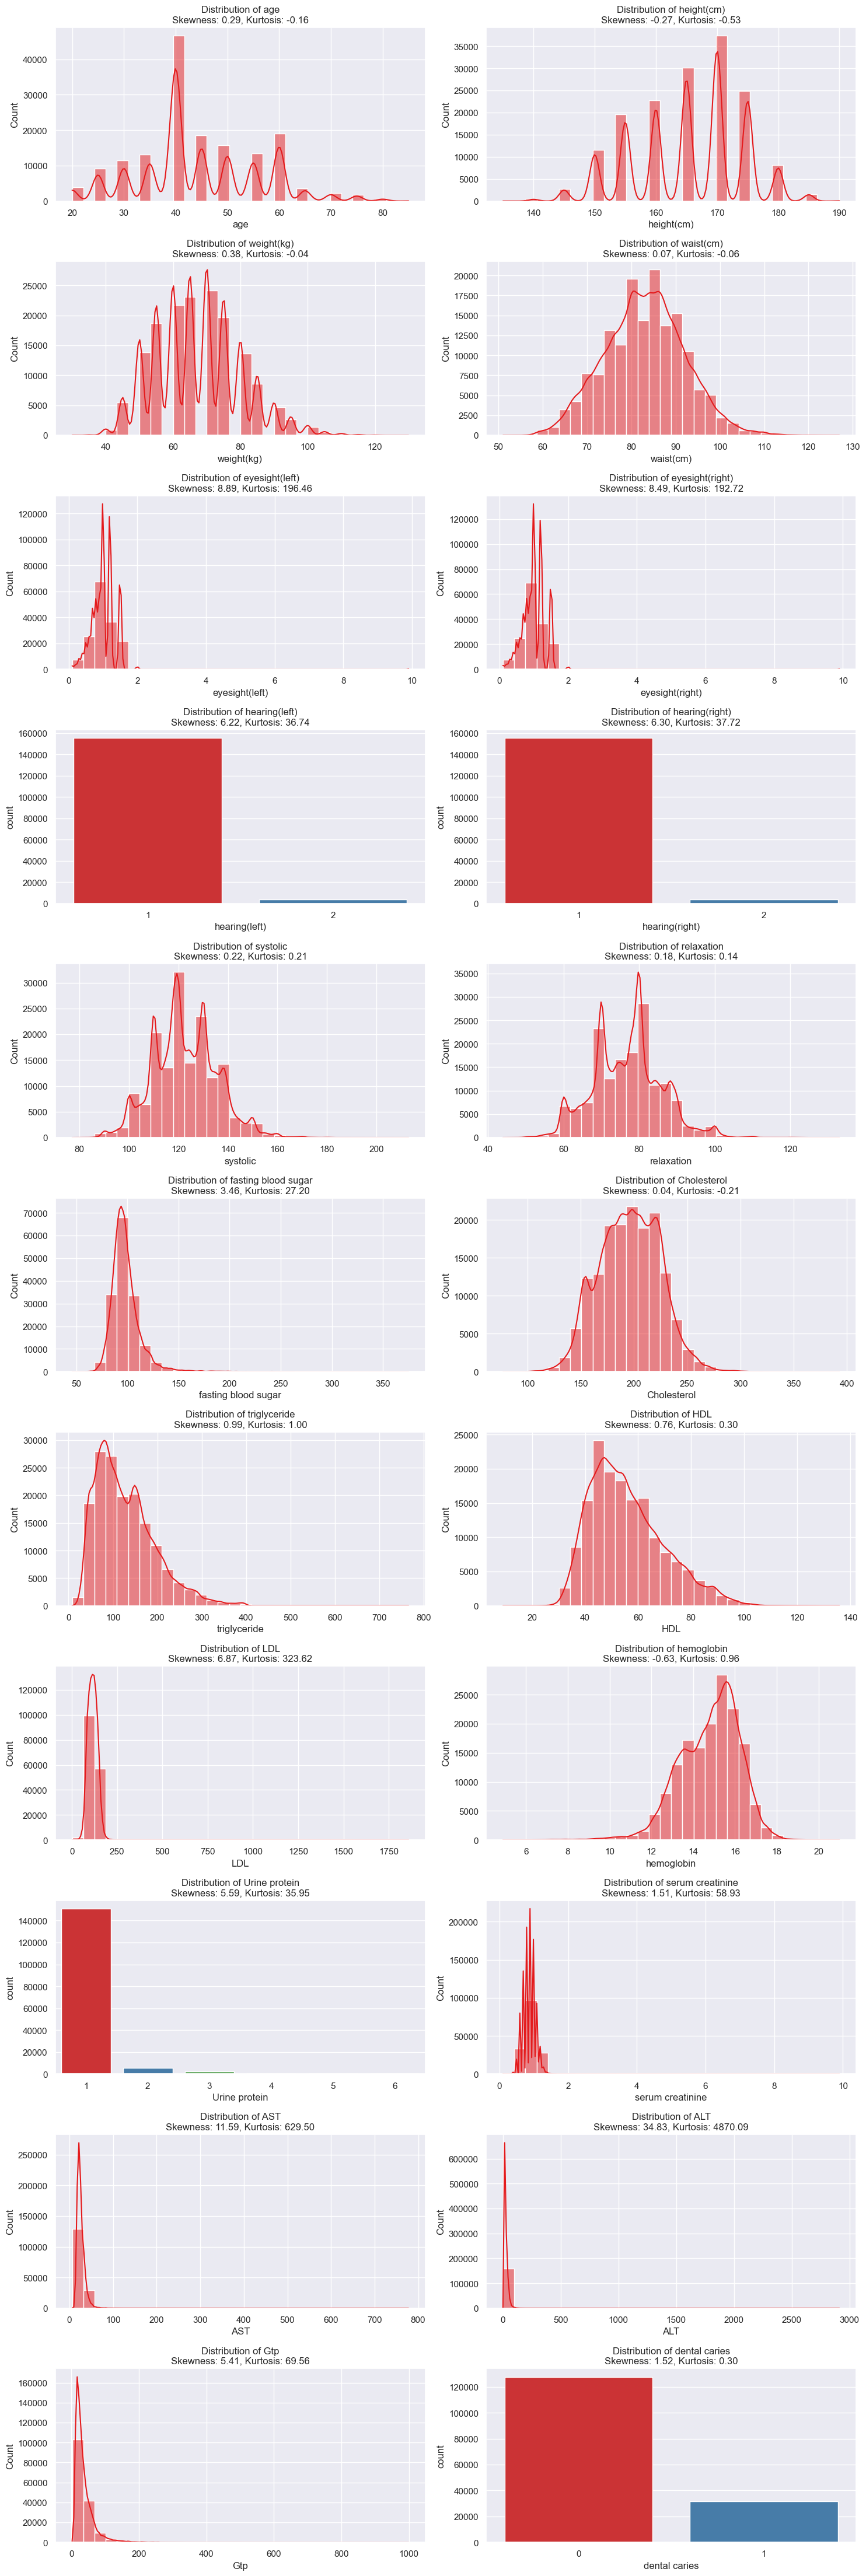

In [194]:
# List of column names to plot
columns_to_plot = train.columns.drop(['smoking'])

num_rows = len(columns_to_plot)
plt.figure(figsize=(15, 4 * num_rows))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, 2, i)
    
    if train[column].nunique() <= 10:
        sns.countplot(x=column, data=train)
    else:
        sns.histplot(train[column], kde=True, bins=30)
        
    skewness = skew(train[column])
    kurt = kurtosis(train[column])
    plt.title(f'Distribution of {column}\nSkewness: {skewness:.2f}, Kurtosis: {kurt:.2f}')
    plt.tight_layout()
plt.show()

### Comparing some of the train and test features distribution and check the outliers in both 

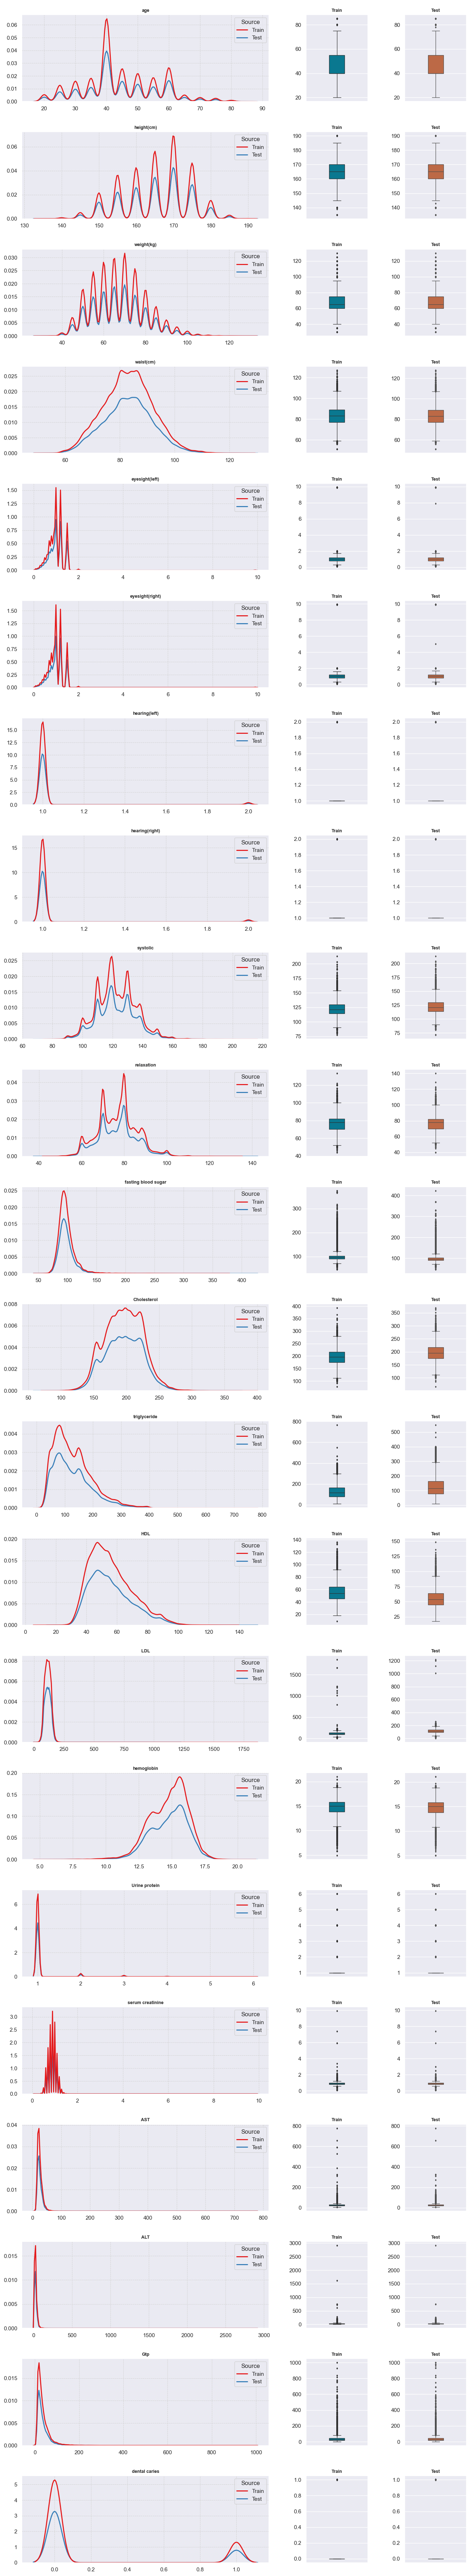

In [195]:
df = pd.concat([train.drop(columns='smoking').assign(Source = 'Train'), 
                test.assign(Source = 'Test')], 
               axis=0, ignore_index = True);

fig, axes = plt.subplots(len(test.columns), 3 ,figsize = (16, len(test.columns) * 4.2), 
                         gridspec_kw = {'hspace': 0.35, 'wspace': 0.3, 'width_ratios': [0.80, 0.20, 0.20]});

for i,col in enumerate(test.columns):
    ax = axes[i,0];
    sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source', ax = ax, linewidth = 2.1)
    ax.set_title(f"\n{col}",fontsize = 9, fontweight= 'bold');
    ax.grid(visible=True, which = 'both', linestyle = '--', color='lightgrey', linewidth = 0.75);
    ax.set(xlabel = '', ylabel = '');
    ax = axes[i,1];
    sns.boxplot(data = df.loc[df.Source == 'Train', [col]], y = col, width = 0.25,saturation = 0.90, linewidth = 0.90, fliersize= 2.25, color = '#037d97',
                ax = ax);
    ax.set(xlabel = '', ylabel = '');
    ax.set_title(f"Train",fontsize = 9, fontweight= 'bold');

    ax = axes[i,2];
    sns.boxplot(data = df.loc[df.Source == 'Test', [col]], y = col, width = 0.25, fliersize= 2.25,
                saturation = 0.6, linewidth = 0.90, color = '#E4591E',
                ax = ax); 
    ax.set(xlabel = '', ylabel = '');
    ax.set_title(f"Test",fontsize = 9, fontweight= 'bold');

plt.tight_layout()
plt.show();



# Bivariate Analysis 

### The Relation between features and the target

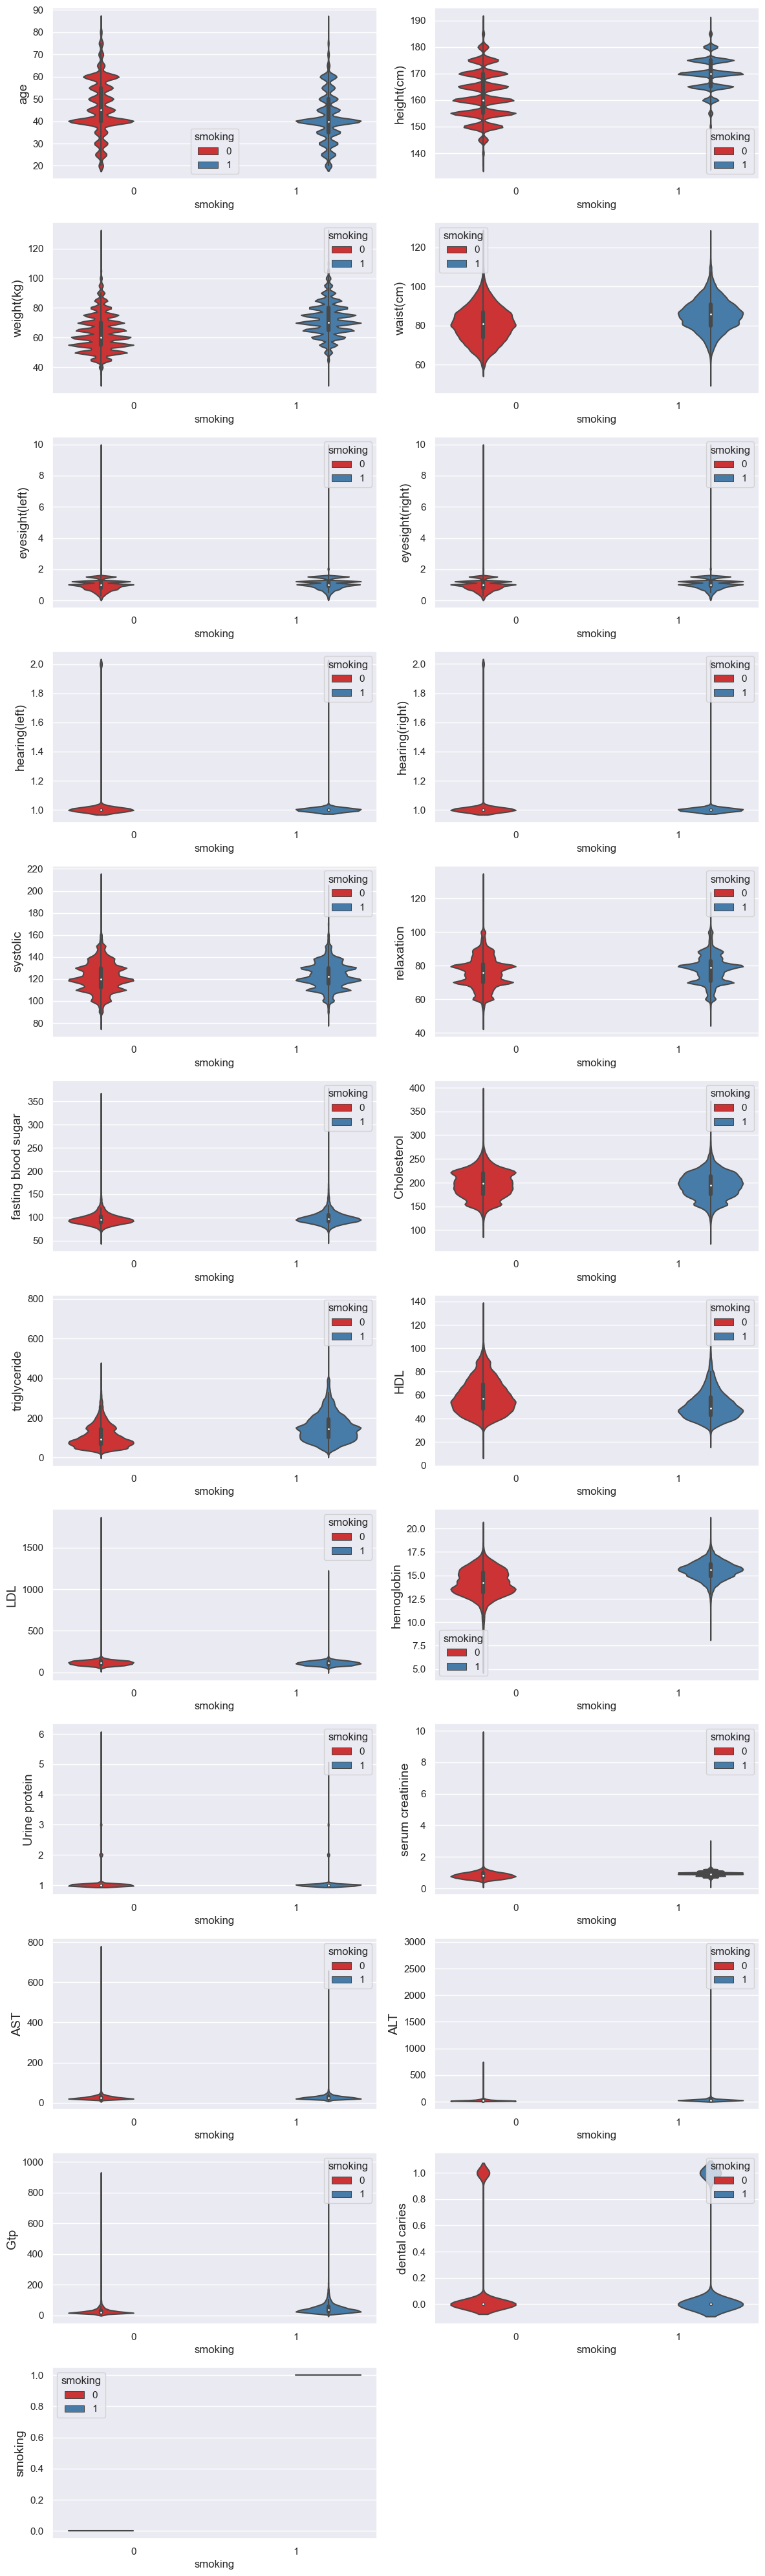

In [196]:
plt.figure(figsize=(12, 40)) 
Target = 'smoking'
num_cols = len(train.columns)
num_rows = math.ceil(num_cols / 2)  # Calculate the number of rows needed

for i, column in enumerate(train.columns, start=1):
    plt.subplot(num_rows, 2, i) 
    sns.violinplot(x=Target, y=column, data=train,hue=Target)
    plt.ylabel(column, fontsize=14) 
    plt.xlabel(Target)

plt.tight_layout()
plt.show()


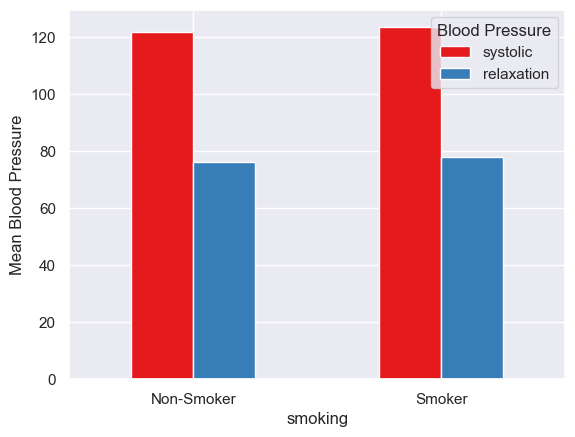

<Figure size 1200x4000 with 0 Axes>

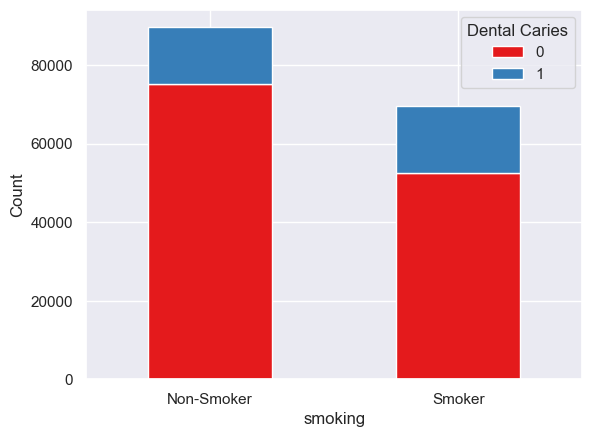

In [100]:
# Group by 'smoking' and calculate mean for 'systolic' and 'relaxation'
bp_means = train.groupby('smoking')[['systolic', 'relaxation']].mean()

# Plot for mean blood pressure
bp_means.plot(kind='bar')
plt.ylabel('Mean Blood Pressure')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'], rotation=0)
plt.legend(title='Blood Pressure')
plt.show()

# Plot for dental caries
plt.figure(figsize=(12, 40))

# Target variable
Target = 'smoking'

dental_caries_cross = pd.crosstab(train['smoking'], train['dental caries'])
dental_caries_cross.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'], rotation=0)
plt.legend(title='Dental Caries')
plt.show()

In [101]:
# pair_plot_cols=[f for f in train.columns if train[f].nunique()>50]

# sns.set(font_scale=1)
# plt.figure(figsize=(18, 10))
# sns.set(style="ticks", color_codes=True)
# sns.pairplot(data=train, vars=pair_plot_cols,diag_kind='kde', 
#         kind='scatter', palette='muted', 
#         plot_kws={'s': 20}, hue='smoking')
# plt.show()

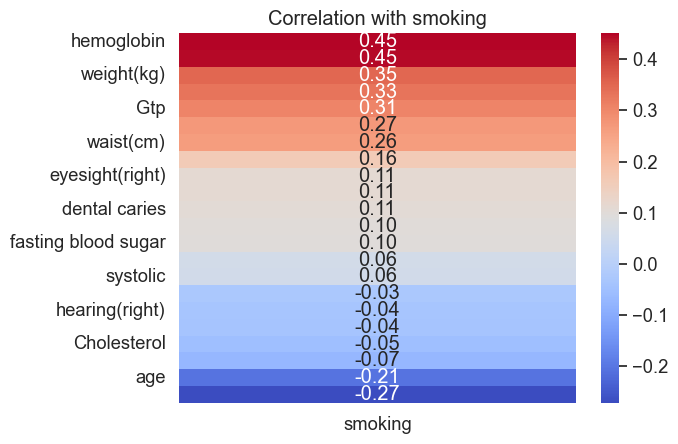

In [197]:
#Graph II
# Create a heatmap of the correlations with the target column
corr = train.corr()
target_corr = corr[Target].drop(Target)

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)
sns.set(font_scale=1.2)
sns.heatmap(target_corr_sorted.to_frame(), annot=True, fmt='.2f',cmap="coolwarm")
plt.title(f'Correlation with {Target}')

plt.show()

# Multivariate Analysis

In [103]:
Target='smoking'

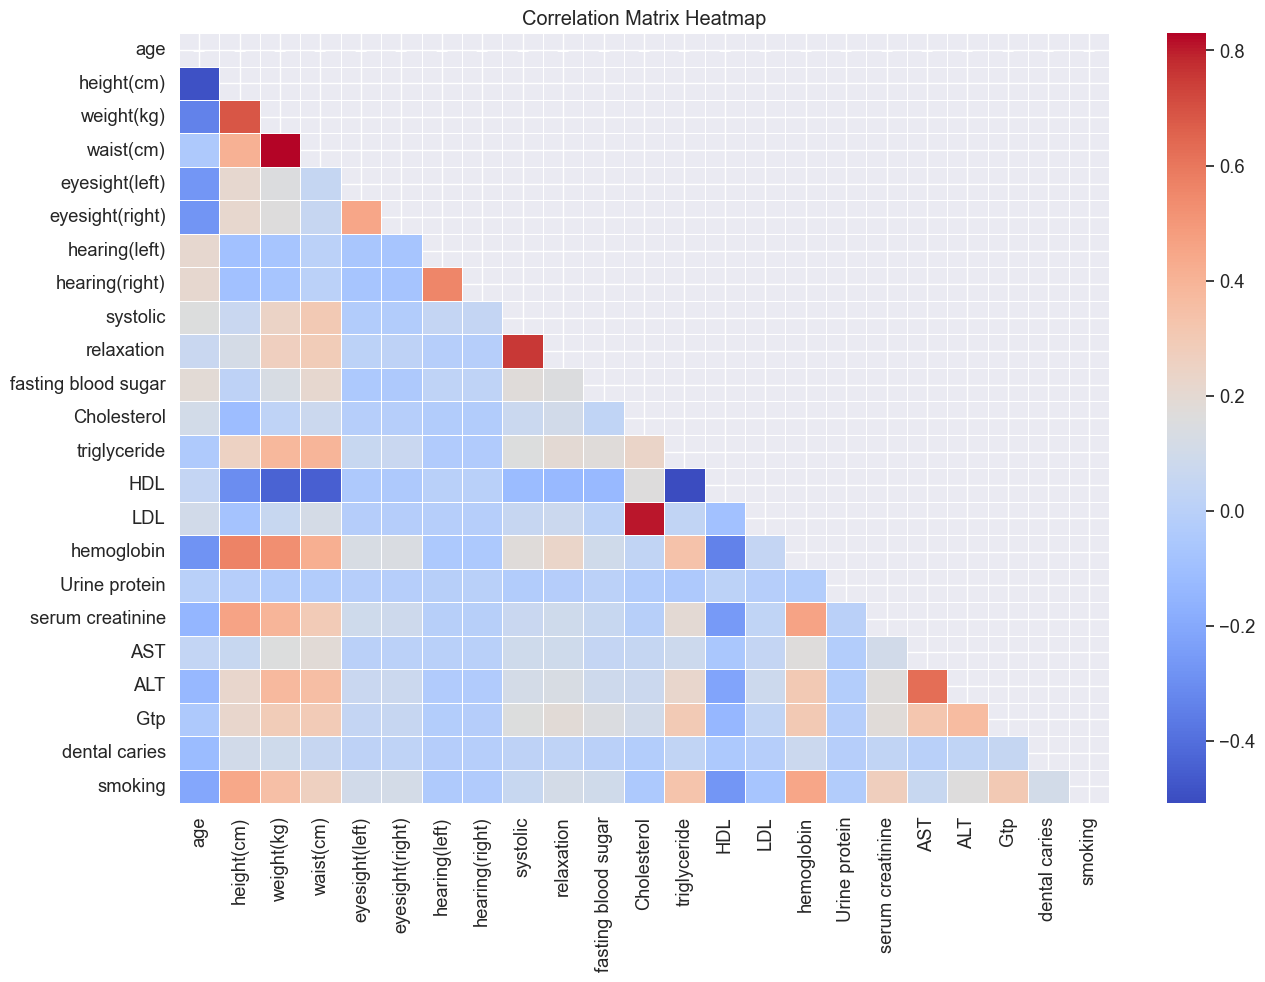

In [198]:
# Compute the correlation matrix
correlation_matrix = train.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#Graph I.
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.2)

sns.heatmap(correlation_matrix,mask = mask,annot=True, linewidths=0.5, fmt='.2f',cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")

plt.show()

> **Note:**  
> 
> There are columns where the cou or distributionnt of smokers doesn't show significant differences compared to the non-smokers. These columns include:
> 
> - Age (partia- BMI
> - Waist
> - Average eye and hearing
> - Systolic blood pressure
> - Diastolic blood (relaxation) pressure
> - Fasting blood sugar
> - Cholesterol
> - HDL cholesterol
> - LDL cholesterol
> - Hemoglobin
> - Urine protein
> - AST (Aspartate Aminotransferase)
> - Serum creatinine
> 
> Conversely, certain columns exhibit notable differences between smokers and non-smokers, making them important for  
> - Gender: Males
> - Weight: 62 and above
> - Waist: 80 and above
> - Triglyceride: 118 and above
> - ALT (Alanine Aminotransferase): 25 and above
> - GTP (Gamma-glutamyl transferase): 31 and above
> - Dental caries: 0.2 and above
> - Tartar: 0.52 and above
> - Chest pain: 3.5 and above
> - Shortness of breath: 3 and above


# Identify if there any clusters 

In [199]:
def perform_hierarchical_clustering(input_data, title):
    """
    Function to perform hierarchical clustering and visualize the clusters in the form of a dendrogram.
    
    Args:
        input_data (pd.core.frame.DataFrame): The data on which to perform hierarchical clustering.
        title (str): The title for the plot.

    Returns:
        None. Displays a dendrogram plot.
    """
    
    # Compute the correlation matrix of the input data
    # It measures linear relationships between variables
    correlation_matrix = input_data.corr()

    # Convert the correlation matrix to distances
    # The distance represents dissimilarity: a value of 0 indicates perfect correlation, while a value of 1 indicates no correlation.
    distance_matrix = 1 - np.abs(correlation_matrix)

    # Perform hierarchical clustering using the "complete" method
    # The "complete" linkage method calculates the maximum distance between sets of observations at each iteration.
    Z = linkage(squareform(distance_matrix), 'complete')
    
    # Create a new figure and set the size and resolution
    fig, ax = plt.subplots(1, 1, figsize=(14, 8), dpi=120)
    
    # Plot the dendrogram
    # The dendrogram visually shows the arrangement of the clusters produced by the corresponding executions of the hierarchical clustering.
    # The y-axis represents the distance or dissimilarity between clusters.
    # The x-axis represents the data points or variables.
    dn = dendrogram(Z, labels=input_data.columns, ax=ax, above_threshold_color='#ff0000', orientation='right', color_threshold=0.7*max(Z[:,2]))
    
    # Add a line indicating a threshold for dissimilarity to aid in identifying clusters
    plt.axvline(x=0.99*max(Z[:,2]), color='k', linestyle='--')
    
    hierarchy.set_link_color_palette(None)  # Reset color palette to default
    
    # Add gridlines to the plot for better readability
    plt.grid(axis='x')
    
    # Set the title of the plot
    plt.title(f'{title} Hierarchical clustering, Dendrogram', fontsize=18, fontweight='bold')

    # Display the plot    
    plt.show()

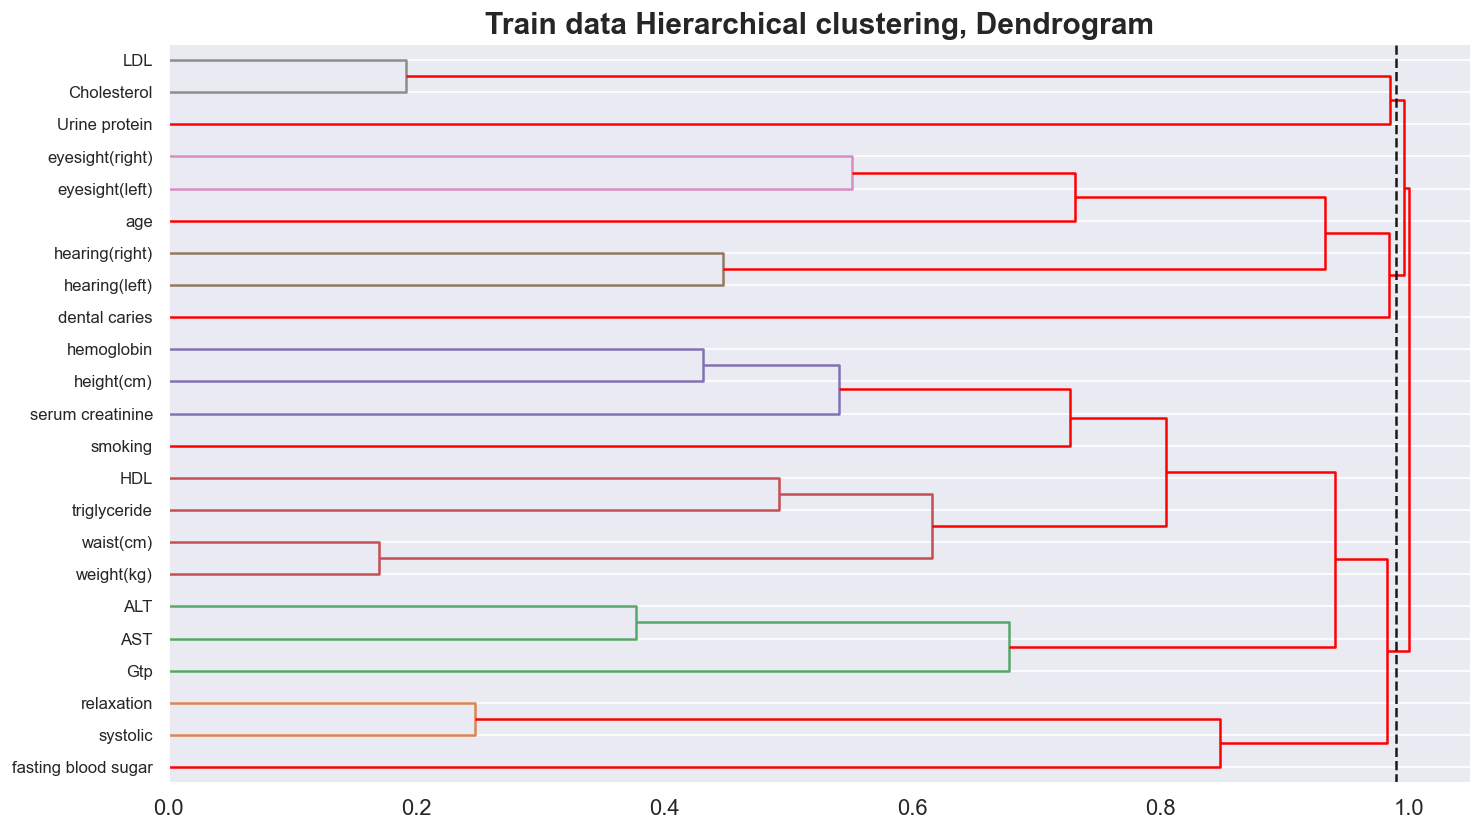

In [200]:
# Perform hierarchical clustering on the train dataset (excluding 'id' column if it exists)
input_data = train.drop(columns=['id'], errors='ignore') if 'id' in train.columns else train
perform_hierarchical_clustering(input_data, title='Train data')

> **Note: Understanding Dendrogram Insights**
> 
> The dendrogram provided serves as a valuable tool for comprehending the relationships among features within your training dataset. By scrutinizing the main clusters and sub-clusters, significant insights can be extracted to formulate actionable strategies.
> 
> **1. Physiological Health Features:**
> 
> - Age
> - Height (cm)
> - Weight (kg)
> - Waist Circumference (cm)
> - Eyesight (left and right)
> - Hearing (left and right)
> - Hemoglobin
> - Urine Protein
> - Dental Caries
> 
> **2. Cardiovascular Health Features:**
> 
> - Systolic Blood Pressure
> - Resting Heart Rate
> - LDL Cholesterol
> - HDL Cholesterol
> - Total Cholesterol
> - Triglycerides
> 
> **3. Metabolic Health Features:**
> 
> - Fasting Blood Sugar
> - Serum Creatinine
> - AST (Aspartate Aminotransferase)
> - ALT (Alanine Aminotransferase)
> - GTP (Gamma-glutamyltransferase)
> 
> In conclusion, a thorough interpretation of the dendrogram offers a holistic view of your training data. This analysis enables the identification of pertinent feature groups, establishes connections between various health aspects, and facilitates the development of personalized intervention strategies.


# Hypothesis Tests :

## Statistical Test Selection

When analyzing the data, various statistical tests were chosen to evaluate different hypotheses. Here is a summary of the tests used along with their respective hypotheses:

- **Age:** Independent samples t-test was used to compare the mean age between smokers and non-smokers.
- **BMI (Body Mass Index):** Independent samples t-test was employed to investigate the association between BMI and smoking status.
- **Blood Pressure:** Independent samples t-test was utilized to examine the differences in systolic and diastolic blood pressure measurements between smokers and non-smokers.
- **Cholesterol Levels:** ANOVA test (if assumptions of ANOVA are not met) were conducted to analyze the differences in cholesterol levels (total cholesterol, HDL, LDL, triglycerides) between smokers and non-smokers.
- **Dental Caries:** Chi-square test was employed to assess the association between the presence of dental caries and smoking status.
- **Liver Enzyme Levels:** ANOVA test was performed to evaluate the differences in liver enzyme levels (AST, ALT, Gtp) between smokers and non-smokers.
- **Hemoglobin Level:** Independent samples t-test was used to determine the differences in hemoglobin levels between smokers and non-smokers.

These tests were chosen based on the nature of the data and the hypotheses being tested.

### Age
- Plot: Boxplots of age for smokers and non-smokers.- 
Test: Independent samples t-test.

In [107]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(train[train['smoking'] == 1]['age'], train[train['smoking'] == 0]['age'])
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -84.02355429476972
P-value: 0.0


### BMI
- Plot: Histograms of BMI for smokers and non-smokers.
- Test: Independent samples t-test.

In [108]:
#Function to calculate BMI
def calculate_bmi(weight_kg, height_cm):
    height_m = height_cm / 100  # converting height from cm to meters
    if weight_kg <= 0 or height_m <= 0:
        return "Invalid input"
    else:
        bmi = weight_kg / (height_m ** 2)
        return bmi

# Applying the BMI calculation function to each row and storing the result in a new column 'BMI'
df=train.copy()
df['BMI'] = df.apply(lambda row: calculate_bmi(row['weight(kg)'], row['height(cm)']), axis=1)


In [109]:
t_stat, p_value = ttest_ind(df[df['smoking'] == 1]['BMI'], df[df['smoking'] == 0]['BMI'])
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 57.13375274569558
P-value: 0.0


## Blood Pressure
- Plot: Bar plot of mean systolic and diastolic blood pressure for smokers and non-smokers.
- Test: Independent samples t-test.

In [110]:
bp_means = train.groupby('smoking')[['systolic', 'relaxation']].mean()


t_stat_systolic, p_value_systolic = ttest_ind(train[train['smoking'] == 1]['systolic'], train[train['smoking'] == 0]['systolic'])
t_stat_relaxation, p_value_relaxation = ttest_ind(train[train['smoking'] == 1]['relaxation'], train[train['smoking'] == 0]['relaxation'])
print("Systolic T-statistic:", t_stat_systolic)
print("Systolic P-value:", p_value_systolic)
print("Diastolic T-statistic:", t_stat_relaxation)
print("Diastolic P-value:", p_value_relaxation)

Systolic T-statistic: 23.442272250398283
Systolic P-value: 2.5479725945745344e-121
Diastolic T-statistic: 43.962535403476814
Diastolic P-value: 0.0


### Cholesterol Levels
- Plot: Violin plot of cholesterol levels (Total Cholesterol, HDL, LDL, Triglycerides) for smokers and non-smokers.
- Test: ANOVA test.



In [111]:
f_stat, p_value = f_oneway(train[train['smoking'] == 1]['Cholesterol'], train[train['smoking'] == 0]['Cholesterol'])
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 430.06121773917056
P-value: 2.1087079332357623e-95


### Dental Caries
- Plot: Bar plot showing the proportion of individuals with and without dental caries for smokers and non-smokers.
- Test: Chi-square test.

In [112]:
dental_caries_cross = pd.crosstab(train['smoking'], train['dental caries'])


chi2_stat, p_value, dof, expected = chi2_contingency(dental_caries_cross)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 1810.4064771591138
P-value: 0.0


### Liver Enzyme Levels
- Plot: Boxplots of AST, ALT, and Gtp levels for smokers and non-smokers.
- Test: ANOVA test.

In [113]:
# Example ANOVA test for AST
f_stat_ast, p_value_ast = f_oneway(train[train['smoking'] == 1]['AST'], train[train['smoking'] == 0]['AST'])
print("AST F-statistic:", f_stat_ast)
print("AST P-value:", p_value_ast)

# Example ANOVA test for ALT
f_stat_alt, p_value_alt = f_oneway(train[train['smoking'] == 1]['ALT'], train[train['smoking'] == 0]['ALT'])
print("ALT F-statistic:", f_stat_alt)
print("ALT P-value:", p_value_alt)

# Example ANOVA test for Gtp
f_stat_gtp, p_value_gtp = f_oneway(train[train['smoking'] == 1]['Gtp'], train[train['smoking'] == 0]['Gtp'])
print("Gtp F-statistic:", f_stat_gtp)
print("Gtp P-value:", p_value_gtp)

AST F-statistic: 563.77854896407
AST P-value: 2.087445510212975e-124
ALT F-statistic: 4347.5855569800615
ALT P-value: 0.0
Gtp F-statistic: 16400.4220011378
Gtp P-value: 0.0


### Hemoglobin Levels
- Plot: Boxplot of hemoglobin levels for smokers and non-smokers.
- Test: Independent samples t-test.



In [114]:
t_stat_hemoglobin, p_value_hemoglobin = ttest_ind(train[train['smoking'] == 1]['hemoglobin'], train[train['smoking'] == 0]['hemoglobin'])
print("T-statistic for Hemoglobin:", t_stat_hemoglobin)
print("P-value for Hemoglobin:", p_value_hemoglobin)

T-statistic for Hemoglobin: 201.47136000752832
P-value for Hemoglobin: 0.0


## Hypothesis Tests Summary
When the p-value<0.05 ==> the H0 will be rejected 
### <span style="color:blue">Age:</span>
- **H0:** There is no significant difference in the life expectancy between smokers and non-smokers.
- **H1:** Non-smokers have a higher life expectancy compared to smokers.
- <span style="color:green">**Result:** (T-statistic = -84.023, p-value = 0.0)</span> ==> we reject the null hypothesis (H0) because the extremely low p-value indicates strong evidence against it. Therefore, we accept the alternative hypothesis (H1), which states that non-smokers have a higher life expectancy compared to smokers.

### <span style="color:blue">BMI (Body Mass Index):</span>
- **H0:** There is no association between BMI and smoking status.
- **H1:** There is a significant association between BMI and smoking status.
- <span style="color:green">**Result:** (T-statistic = 57.133, p-value = 0.0)</span>. ==> we reject the null hypothesis (H0) because the extremely low p-value indicates strong evidence against it. Therefore, we accept the alternative hypothesis (H1), which states that there is a significant association between BMI and smoking status. Specifically, the mean BMI of non-smokers is significantly higher than that of smokers.

### <span style="color:blue">Blood Pressure:</span>
- **H0:** There is no significant difference in blood pressure measurements between smokers and non-smokers.
- **H1:** Smokers have significantly different blood pressure measurements compared to non-smokers.
- <span style="color:green">**Result:** The t-test showed significant differences in systolic (T-statistic = 23.442, p-value = 2.54e-121 ≈ 0.0) and diastolic (T-statistic = 43.962, p-value = 0.0) blood pressure between smokers and non-smokers.</span> ==>  we reject the null hypothesis (H0) because the extremely low p-values indicate strong evidence against it. Therefore, we accept the alternative hypothesis (H1), which states that smokers have significantly different blood pressure measurements compared to non-smokers. Specifically, smokers have higher blood pressure (both systolic and diastolic) compared to non-smokers.

### <span style="color:blue">Cholesterol Levels:</span>
- **H0:** There is no difference in cholesterol levels between smokers and non-smokers.
- **H1:** Cholesterol levels differ significantly between smokers and non-smokers.
- <span style="color:green">**Result:** The ANOVA test indicated significant differences in cholesterol levels between smokers and non-smokers (F-statistic = 430.061, p-value = 2.108e-95).</span> ==> we reject the null hypothesis (H0) because the extremely low p-value indicates strong evidence against it. Therefore, we accept the alternative hypothesis (H1), which states that cholesterol levels differ significantly between smokers and non-smokers.

### <span style="color:blue">Dental Caries:</span>
- **H0:** There is no association between the presence of dental caries and smoking status.
- **H1:** Individuals who smoke are more likely to have dental caries compared to non-smokers.
- <span style="color:green">**Result:** The chi-square test revealed a significant association between dental caries and smoking status (Chi-square statistic = 1810.406, p-value = 0.0).</span> ==> we reject the null hypothesis (H0) because the extremely low p-value indicates strong evidence against it. Therefore, we accept the alternative hypothesis (H1), which states that individuals who smoke are more likely to have dental caries compared to non-smokers.

### <span style="color:blue">Liver Enzyme Levels:</span>
- **H0:** There is no difference in liver enzyme levels between smokers and non-smokers.
- **H1:** Liver enzyme levels vary significantly between smokers and non-smokers.
- <span style="color:green">**Result:** ANOVA tests for AST, ALT, and Gtp showed significant differences between smokers and non-smokers (AST F-statistic = 563.7785, p-value = 2.0874e-124; ALT F-statistic = 4347.5856, p-value = 0.0; Gtp F-statistic = 16400.4220, p-value = 0.0).</span> ==> We reject the null hypothesis (H0) because the extremely low p-values indicate strong evidence against it. Therefore, we accept the alternative hypothesis (H1), which states that liver enzyme levels (AST, ALT, Gtp) vary significantly between smokers and non-smokers.


### <span style="color:blue">Hemoglobin Level:</span>
- **H0:** There is no difference in hemoglobin levels between smokers and non-smokers.
- **H1:** Hemoglobin levels differ significantly between smokers and non-smokers.
- <span style="color:green">**Result:** The independent samples t-test revealed a significant difference in hemoglobin levels between smokers and non-smokers (T-statistic =  201.4714, p-value =  0.0)</span> ==> we reject the null hypothesis (H0) because the extremely low p-value indicates strong evidence against it. Therefore, we accept the alternative hypothesis (H1), which states that hemoglobin levels differ significantly between smokers and non-smokers.
]).


# Focusing on model

### Utility Functions 

<img src="https://miro.medium.com/v2/resize:fit:1200/0*vlaAZ0jKCoihMaI9.png" alt="ROC Curves" width="400">


In [115]:
# 1. ROC Curve and AUC
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color=color_palette, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color=color_palette, lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# 2. Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred > 0.5)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()



In [116]:
def Show_summary(all_scores):   
    # Convert the concatenated dictionary to a DataFrame
    df = pd.DataFrame.from_dict(all_scores, orient='index', columns=['Score'])
    df.index.name = 'Algorithm'
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.bar(df.index, df['Score'], color=sns.color_palette("Set1"))
    plt.xlabel('Algorithm')
    plt.ylabel('Score')
    plt.title('Algorithm Scores')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Print the DataFrame
    print(df)

## Spliting the train data into train and validation 

**Initially we did  train_test_split method from sklearn library and then we try to do it manually as it required**


In [117]:
target="smoking"

#Train-Validation data split
X = train.drop(target, axis=1)
y = train[target]

# Set random seed for reproducibility
np.random.seed(42)

# Shuffle the indices
indices = np.random.permutation(len(train))

# Define the split ratio
split_ratio = 0.8

# Calculate the split index
split_index = int(len(train) * split_ratio)

# Split the data
X_train, X_val = X.iloc[indices[:split_index]], X.iloc[indices[split_index:]]
y_train, y_val = y.iloc[indices[:split_index]], y.iloc[indices[split_index:]]

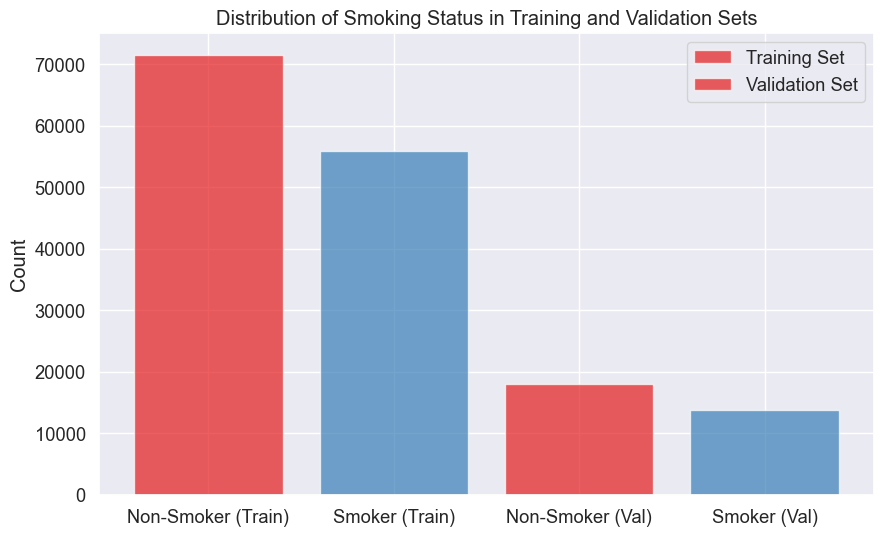

In [118]:
# Count the occurrences of each class in the training and validation sets
train_smoking_counts = y_train.value_counts()
val_smoking_counts = y_val.value_counts()

# Plotting
plt.figure(figsize=(10, 6))

# Training set
plt.bar(['Non-Smoker (Train)', 'Smoker (Train)'], train_smoking_counts, color=sns.color_palette("Set1"), alpha=0.7, label='Training Set')

# Validation set
plt.bar(['Non-Smoker (Val)', 'Smoker (Val)'], val_smoking_counts, color=sns.color_palette("Set1"), alpha=0.7, label='Validation Set')

plt.title('Distribution of Smoking Status in Training and Validation Sets')
plt.ylabel('Count')
plt.legend()
plt.show()

In [119]:
Model_scores_before_preprocessing={}
Model_scores_after_preprocessing={}

# Let's create a baseline model before preprocessing 

## Models :
    - Random Forest Classifier 
    - LightGBM Classifier
    - CatBoost Classifier
    - XGBoost Classifier

In [120]:
%%time
# Initialize models
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'LGBMClassifier': LGBMClassifier(),
    'CatBoostClassifier': CatBoostClassifier(verbose=0),
    'XGBClassifier': XGBClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    y_prob=model.predict_proba(X_val)[:, 1]
    Model_scores_before_preprocessing[model_name] = roc_auc_score(y_val, y_prob)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55861, number of negative: 71543
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2148
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.438456 -> initscore=-0.247432
[LightGBM] [Info] Start training from score -0.247432
Learning rate set to 0.08163
0:	learn: 0.6524718	total: 15.1ms	remaining: 15.1s
300:	learn: 0.4309763	total: 4.54s	remaining: 10.5s
600:	learn: 0.4156592	total: 9.07s	remaining: 6.02s
900:	learn: 0.4023895	total: 13.8s	remaining: 1.52s
999:	learn: 0.3985499	total: 15.3s	remaining: 0us
CPU times: total: 49.7 s
Wall time: 44.6 s


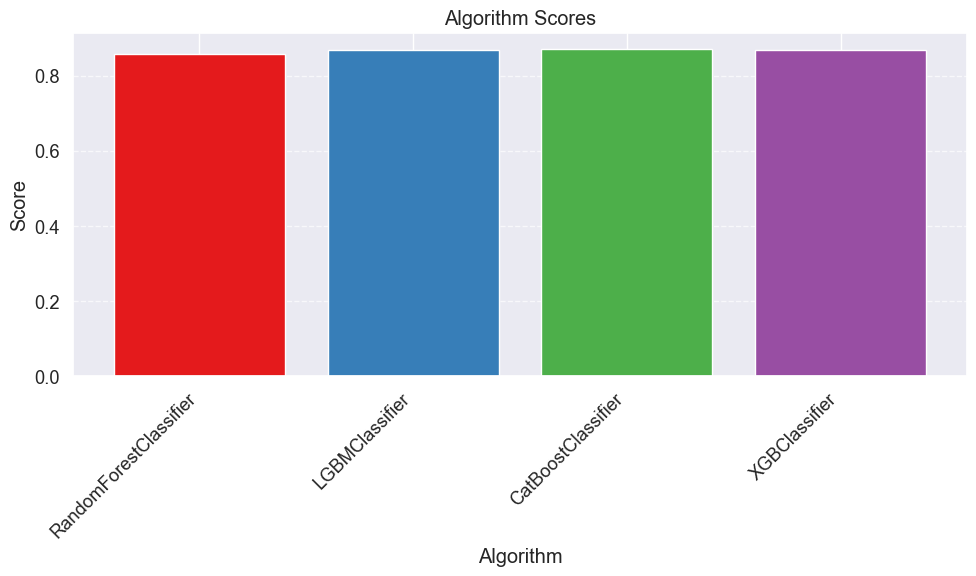

                           Score
Algorithm                       
RandomForestClassifier  0.858629
LGBMClassifier          0.867239
CatBoostClassifier      0.871028
XGBClassifier           0.866780


In [121]:
# Evaluation Before Data Preprocessing 
Show_summary(Model_scores_before_preprocessing)

# Feature Importance - Base models - Feature Selection

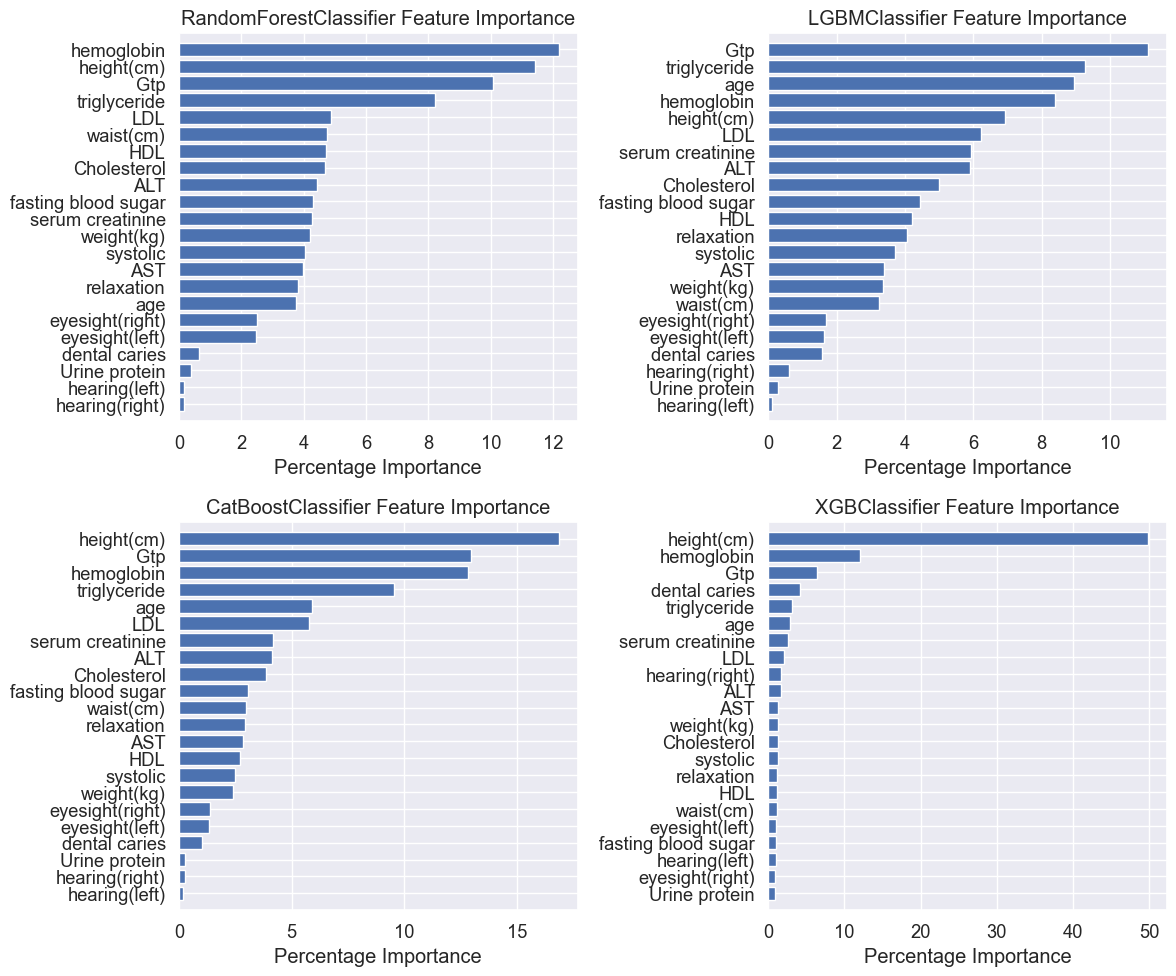


The unimportant features for each model:

------------------------------------------------------------
RandomForestClassifier: hearing(right), hearing(left), Urine protein, dental caries
------------------------------------------------------------
LGBMClassifier: hearing(left), Urine protein, hearing(right)
------------------------------------------------------------
CatBoostClassifier: hearing(left), hearing(right), Urine protein
------------------------------------------------------------
XGBClassifier: Urine protein, eyesight(right), hearing(left)


In [122]:
unimportant_features = {}  # Dictionary to store unimportant features for each model

# Plot feature importance for each model with transposed subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (model_name, model) in zip(axes, models.items()):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)
        importances = importances[indices] / np.sum(importances) * 100  # Convert to percentage
        ax.barh(range(X_train.shape[1]), importances, align='center')
        ax.set_title(f'{model_name} Feature Importance')
        ax.set_yticks(range(X_train.shape[1]))
        ax.set_yticklabels(np.array(X_train.columns)[indices])
        ax.set_ylim([-1, X_train.shape[1]])
        ax.set_xlabel('Percentage Importance')
        
        # Find unimportant features (importance < 1%)
        unimportant_indices = indices[importances < 1]
        unimportant_feature_names = np.array(X_train.columns)[unimportant_indices]
        unimportant_features[model_name] = list(unimportant_feature_names)

plt.tight_layout()
plt.show()

print('\nThe unimportant features for each model:')
print()
for model_name, unimportant_feats in unimportant_features.items():
    print('-'*60)
    print(f'{model_name}: {", ".join(unimportant_feats)}')

In [123]:
# Initialize a set with the unimportant features from the first model
common_unimportant_features = set(unimportant_features[next(iter(unimportant_features))])

# Iterate over the remaining models and update the set with the intersection of unimportant features
for model_name, unimportant_feats in unimportant_features.items():
    common_unimportant_features.intersection_update(unimportant_feats)

# Convert the set to a list
common_unimportant_features_list = list(common_unimportant_features)

# Print the list of features that appear unimportant for all models
print("Features that appear unimportant for all models:", common_unimportant_features_list)

Features that appear unimportant for all models: ['Urine protein', 'hearing(left)']


# Data Preprocessing 

In [124]:
df_train=train.copy()
df_test=test.copy()

## Utility functions

### Handle outliers : 
![Outlier Analysis](https://miro.medium.com/v2/resize:fit:1358/1*85abbcD7cQUX207L2ubAow.png)


Purpose:
The purpose of handling outliers is to ensure that the presence of extreme values in the dataset does not unduly influence the performance or accuracy of machine learning models. Outliers can arise due to various reasons such as data entry errors, measurement variability, or genuine anomalies in the data. 

In [125]:
train.shape

(159256, 23)

#### Classic method

In [126]:
def Handle_outliers(data, Numerical_features):
    for feature in Numerical_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound),
                                 data[feature].mean(), data[feature])
    return data

In [127]:
df=train.copy()
df=Handle_outliers(df,test.columns)

In [128]:
df.shape

(159256, 23)

> **The previous approach did not meet our needs as it failed to identify outliers.** so we attempted to handle outliers manually based on domain knowledge and research. Below is the method we devised for this purpose:

In [129]:
def drop_outliers(df, column_name=None, lower_bound=None, upper_bound=None):
    if column_name is None:
        raise ValueError("Please provide a column_name.")
    
    if lower_bound is not None and upper_bound is not None:
        mask = (df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)
    elif lower_bound is not None:
        mask = (df[column_name] >= lower_bound)
    elif upper_bound is not None:
        mask = (df[column_name] <= upper_bound)
    else:
        raise ValueError("At least one of lower_bound or upper_bound must be provided.")
    
    df_filtered = df[mask]
    return df_filtered

In [130]:
df=train.copy()

# for systolic values according to the domain is 80 to 220
df= drop_outliers(df, column_name="systolic", lower_bound=80, upper_bound=220)

# for diastolic values according to the domain is 45 to 120
df= drop_outliers(df, column_name="relaxation", lower_bound=45, upper_bound=120)

# for fasting blood sugar values according to the domain is 350 as max
df= drop_outliers(df, column_name="fasting blood sugar", upper_bound=350)

# for Cholesterol values according to the domain is 400 as max
df= drop_outliers(df, column_name="Cholesterol", upper_bound=400)

# for triglyceride values according to the domain is 432
df= drop_outliers(df, column_name="triglyceride", upper_bound=432)

# for HDL values according to the domain is 200
df= drop_outliers(df, column_name="HDL", upper_bound=200)

# for LDL values according to the domain is 500
df= drop_outliers(df, column_name="LDL", upper_bound=500)

# for hemoglobin values according to the domain is 6
df= drop_outliers(df, column_name="hemoglobin", lower_bound=6)

# for serum creatinine values according to the domain is 8
df= drop_outliers(df, column_name="serum creatinine", upper_bound=8)

# for AST values according to the domain is 600
df= drop_outliers(df, column_name="AST", upper_bound=600)
               
# for ALT values according to the domain is 1000
df= drop_outliers(df, column_name="ALT", upper_bound=1000)

In [131]:
train=df.copy()
df.shape

(159212, 23)

> **Note:**  
> Initial Shape: (159256, 24)  
> New Shape: (159212, 24)  
> 
> After processing, there are 44 rows that got deleted.

### Check duplicated rows

In [132]:
df.duplicated().any()

False

> **Note:**  
> There are no duplicated rows on our train dataset

### Feature Engineering 

Purpose:
Feature engineering involves creating new features or transforming existing ones to enhance the predictive performance of machine learning models. It aims to extract valuable information from raw data, improve model interpretability, and increase model accuracy.

In [133]:
# Adding features
def FE(df):
    #BMI
    df['BMI'] = df.apply(lambda row: calculate_bmi(row['weight(kg)'], row['height(cm)']), axis=1)
    
    df['serum creatinine'] = np.clip(df['serum creatinine'], 0, 3)  

    # Calculate waist to height ratio
    df['waist_height_ratio'] = df['waist(cm)'] / df['height(cm)']

    # Calculate average eyesight
    df['average_eyesight'] = df[['eyesight(left)', 'eyesight(right)']].mean(axis=1) 
    
    # Calculate average hearing
    df['average_hearing'] = df[['hearing(left)', 'hearing(right)']].mean(axis=1)

    # Categorize blood pressure into ranges
    df['blood_pressure_category'] = pd.cut(df['systolic'], bins=[0, 120, 140, np.inf], labels=[0.0, 1.0, 2.0])
                                                        # 0 for 'Normal', 1 for 'Prehypertension', 2 for 'Hypertension'
    df['blood_pressure_category'] = df['blood_pressure_category'].astype(float)
    
    # Calculate cholesterol ratio
    df['cholesterol_ratio'] = df['HDL'] / df['LDL']
    
    return df


> height : we already use it in BMI to know something
> eye and hearing : because we already use it to make 2 features instead of 4

### Drop unecessary cols : 
Purpose:
The purpose of dropping unnecessary columns from a dataset is to streamline the data preprocessing pipeline and improve the efficiency and effectiveness of machine learning algorithms. 

**Dont forget that we dropped the id column**

> **Note:**  
> 
> - Default: These columns are considered unimportant for all base models.
> - Height: This information is already utilized in calculating BMI, providing redundant information.
> - Eye and Hearing: These features were used to create two other features, reducing redundancy and dimensionality in the dataset.

In [134]:
## Dropping unecessary cols
def Drop_unecessary_cols(train,test):
    Unnecessary_cols=list(set(['height(cm)' , 'eyesight(left)', 'eyesight(right)' , 'hearing(left)','hearing(right)']+common_unimportant_features_list))
    
    train.drop(Unnecessary_cols,axis=1,inplace=True)
    test.drop(Unnecessary_cols,axis=1,inplace=True)
    
    print(f'{len(Unnecessary_cols)} features were deleted.')

> **Note:**  
> We will use this method after feature engineering

### Encoding 
we refrained from employing encoding techniques as our dataset solely comprises numerical features. Tree-based algorithms can effectively process numerical data without the need for encoding categorical variables.

### Feature Scaling

In [135]:
def feature_scaling(train, test):
    from sklearn.preprocessing import StandardScaler

    # Concatenate train and test data
    all_data = pd.concat([train, test], axis=0)

    # Apply StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(all_data)

    # Assign scaled data back to train and test
    train_scaled = pd.DataFrame(scaled_data[:len(train)], columns=train.columns)
    test_scaled = pd.DataFrame(scaled_data[len(train):], columns=test.columns)

    return train_scaled, test_scaled

In [136]:
def Drop_and_FE(train,test):
    
    initial_test_columns = len(test.columns)
    # Feature Engineering 
    train = FE(train)
    test = FE(test)
    print(f'{len(test.columns) - initial_test_columns} features added.')
    # Drop unecessary features 
    Drop_unecessary_cols(train,test)

    

    return train,test

In [137]:
train,test=Drop_and_FE(train,test)

6 features added.
6 features were deleted.


In [138]:
print("for Train : ")
print("original shape:   ", df_train.shape)
print("preprocessed shape:", train.shape)
print("--"*60)
print("for Test : ")
print("original shape:   ", df_test.shape)
print("preprocessed shape:", test.shape)

for Train : 
original shape:    (159256, 23)
preprocessed shape: (159212, 23)
------------------------------------------------------------------------------------------------------------------------
for Test : 
original shape:    (106171, 22)
preprocessed shape: (106171, 22)


### Check the correlation after PreProcessing

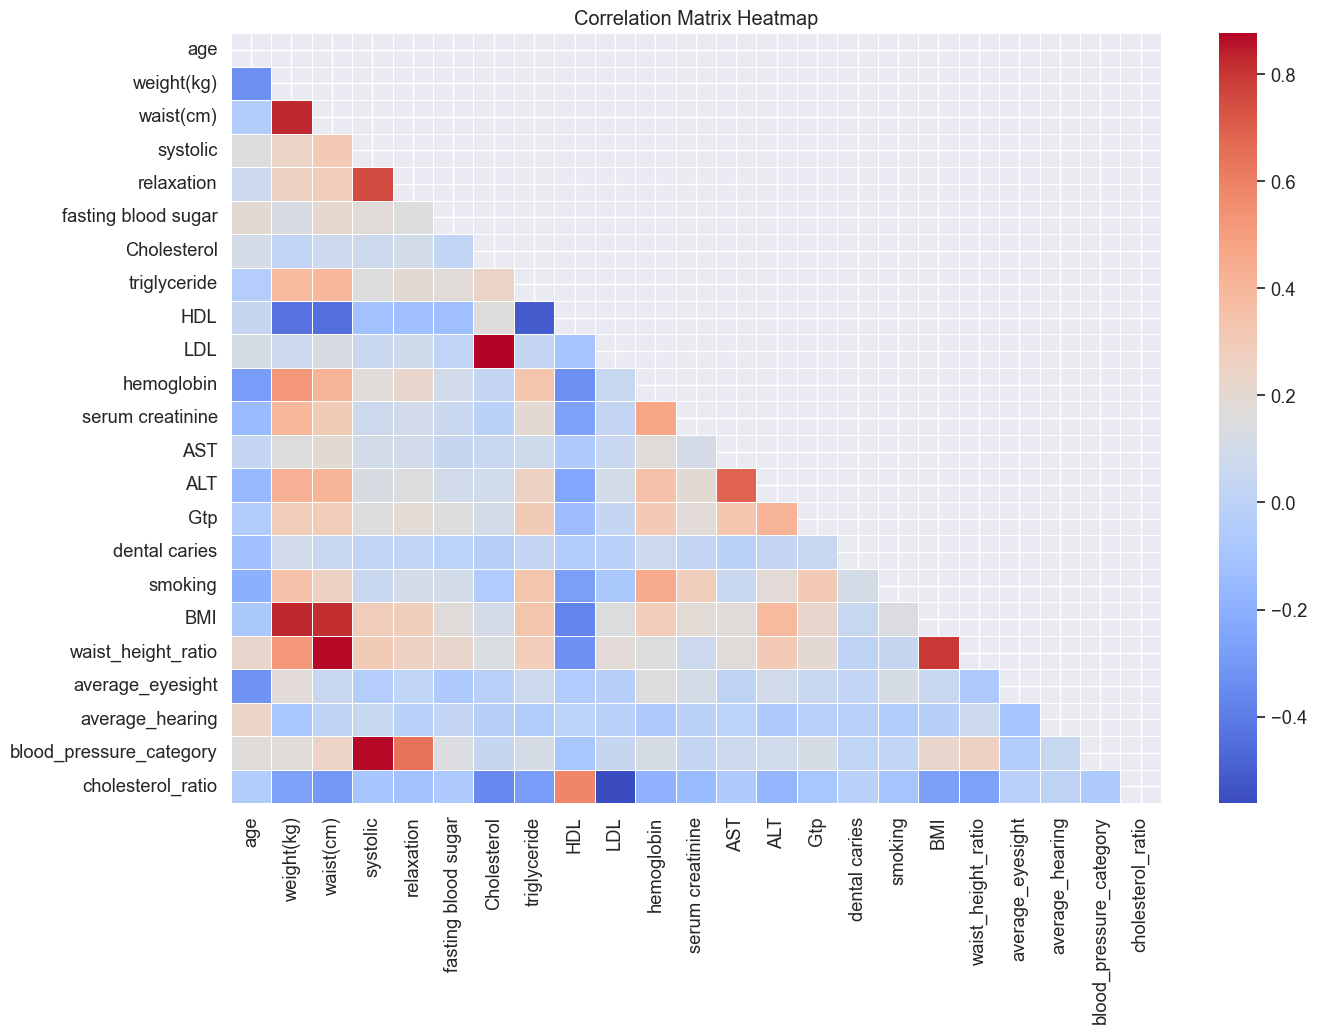

In [139]:
# Compute the correlation matrix
correlation_matrix = train.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#Graph I.
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.2)

sns.heatmap(correlation_matrix,mask = mask,annot=False, linewidths=0.5, fmt='.2f',cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

> Given the strong correlations observed among some features, it is evident that PCA (Principal Component Analysis) could prove beneficial in addressing this problem.

# Principal Component Analysis (PCA)
Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [140]:
# Step 1: Standardize the data
train_scaled,test_scaled=feature_scaling(train.drop(columns="smoking"), test)

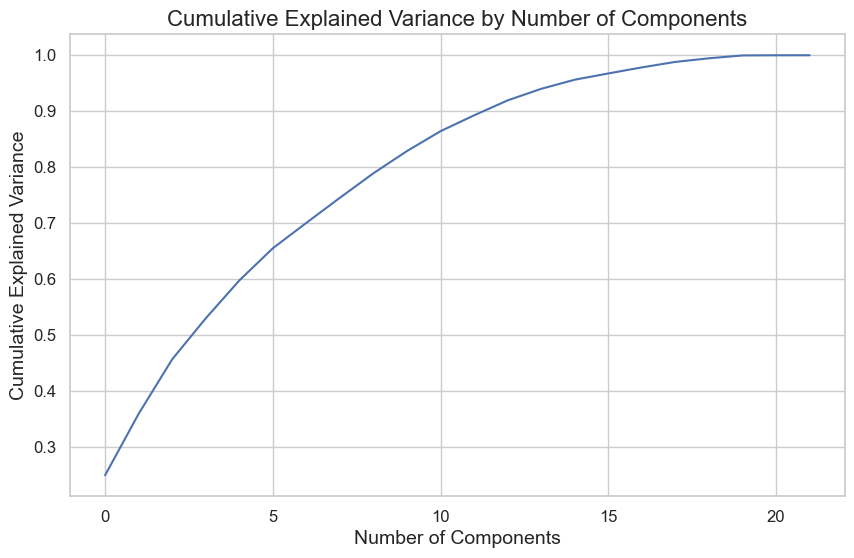

In [141]:
sns.set()

# Fit PCA to the data
pca = PCA().fit(train_scaled)

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
sns.set_style("whitegrid")   # Set seaborn style for the plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance by Number of Components', fontsize=16)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.xticks(fontsize=12)   # Adjust font size for x-axis ticks
plt.yticks(fontsize=12)   # Adjust font size for y-axis ticks
plt.grid(True)
plt.show()

> **We can notice that with 17 components we can get roughly 98% of explained variance**

In [142]:
%%time
# Step 2: Apply PCA on the training data
pca = PCA(n_components=17)  
train_pca = pca.fit_transform(train_scaled)
train_pca = pd.DataFrame(train_pca, columns=[f"PC{i}" for i in range(1, 18)])  # Creating a DataFrame for the transformed train data
train_pca["smoking"] = train['smoking']  # Adding the 'smoking' column back to the DataFrame

# Step 3: Transform the test data using the same PCA transformation
test_pca = pca.transform(test_scaled)
test_pca = pd.DataFrame(test_pca, columns=[f"PC{i}" for i in range(1, 18)])  # Creating a DataFrame for the transformed test data

CPU times: total: 2.3 s
Wall time: 578 ms


In [143]:
print("for Train : ")
print("original shape:   ", train.shape)
print("transformed shape:", train_pca.shape)
print("--"*60)
print("for Test : ")
print("original shape:   ", test.shape)
print("transformed shape:", test_pca.shape)

for Train : 
original shape:    (159212, 23)
transformed shape: (159212, 18)
------------------------------------------------------------------------------------------------------------------------
for Test : 
original shape:    (106171, 22)
transformed shape: (106171, 17)


In [144]:
# train=train_pca.copy()
# test=test_pca.copy()

# # Drop rows with missing values
# train = train.dropna()
# test = test.dropna()

> **Note: Decision Regarding PCA Implementation**
> 
> Despite initial considerations for utilizing PCA due to strong feature correlations, subsequent testing revealed that its implementation did not yield the anticipated improvements. Surprisingly, the results obtained were even worse than those achieved prior to preprocessing the data. Consequently, PCA was omitted from the subsequent steps.

## Respliting the train data into train and validation 

In [145]:
target="smoking"

#Train-Validation data split
X = train.drop(target, axis=1)
y = train[target]

# Set random seed for reproducibility
np.random.seed(42)

# Shuffle the indices
indices = np.random.permutation(len(train))

# Define the split ratio
split_ratio = 0.9 # 90% for the train and 10% for the test 

# Calculate the split index
split_index = int(len(train) * split_ratio)

# Split the data
X_train, X_val = X.iloc[indices[:split_index]], X.iloc[indices[split_index:]]
y_train, y_val = y.iloc[indices[:split_index]], y.iloc[indices[split_index:]]

In [146]:
# Model Parameters

# LightGBM
lgbm_params = {
    'n_estimators': 1700,
    'max_depth': 7,
    'learning_rate': 0.09,
    'colsample_bytree': 0.8,
    }

# XGBoost
xgb_params = {
    'n_estimators': 1700,
    'max_depth': 7,
    'learning_rate': 0.09,
    'colsample_bytree': 0.8,
    'reg_lambda': 0.5
    }

# CatBoost
catboost_params = {
    'iterations': 1700,
    'depth': 7,
    'learning_rate': 0.09
    }

In [147]:
%%time 

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
y_prob=model.predict_proba(X_val)[:, 1]
print("\nClassification Report:\n", classification_report(y_val, y_pred_val))
print("\nArea Under the ROC Curve:\n", roc_auc_score(y_val, y_prob))
Model_scores_after_preprocessing['RandomForestClassifier'] = roc_auc_score(y_val, y_prob)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      8941
           1       0.72      0.79      0.75      6981

    accuracy                           0.77     15922
   macro avg       0.77      0.78      0.77     15922
weighted avg       0.78      0.77      0.77     15922


Area Under the ROC Curve:
 0.8581172063351016
CPU times: total: 33.7 s
Wall time: 35.4 s


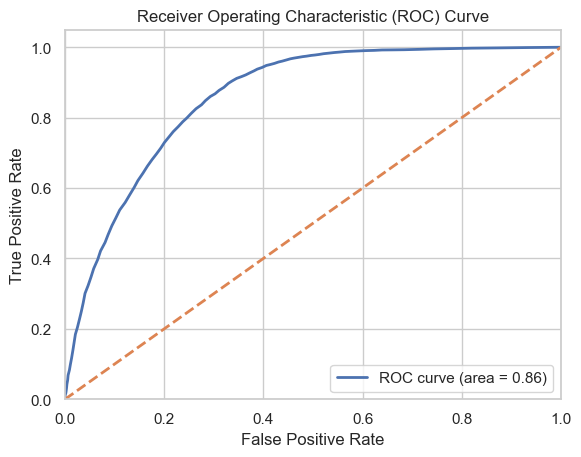

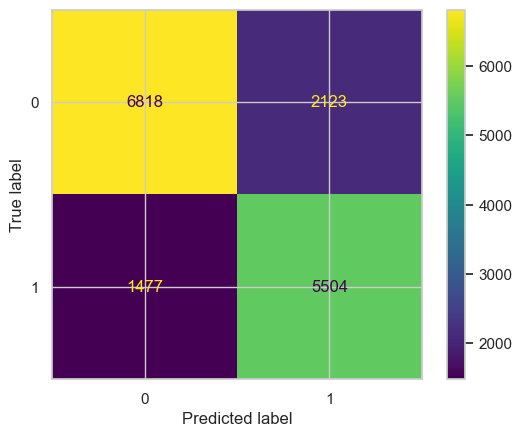

In [148]:
plot_roc_curve(y_val, y_prob)
plot_confusion_matrix(y_val, y_pred_val)

In [149]:
%%time

model=LGBMClassifier(**lgbm_params, verbosity = -1)
model.fit(X_train,y_train)
y_pred_val = model.predict(X_val)
y_prob=model.predict_proba(X_val)[:, 1]
print("\nClassification Report:\n", classification_report(y_val, y_pred_val))
print("\nArea Under the ROC Curve:\n", roc_auc_score(y_val, y_prob))
Model_scores_after_preprocessing['LGBMClassifier'] = roc_auc_score(y_val, y_prob)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      8941
           1       0.74      0.80      0.77      6981

    accuracy                           0.79     15922
   macro avg       0.79      0.79      0.79     15922
weighted avg       0.79      0.79      0.79     15922


Area Under the ROC Curve:
 0.8728966848695249
CPU times: total: 26.3 s
Wall time: 6.81 s


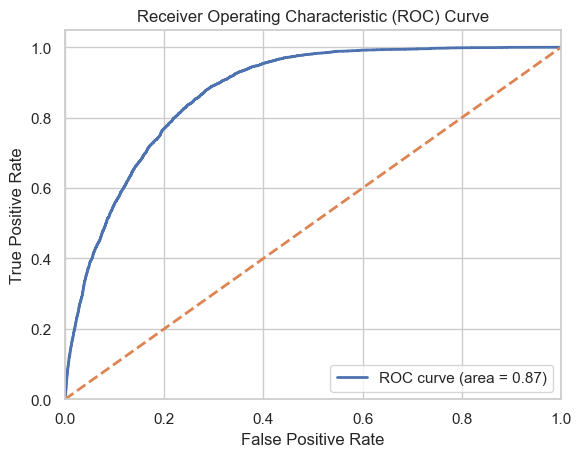

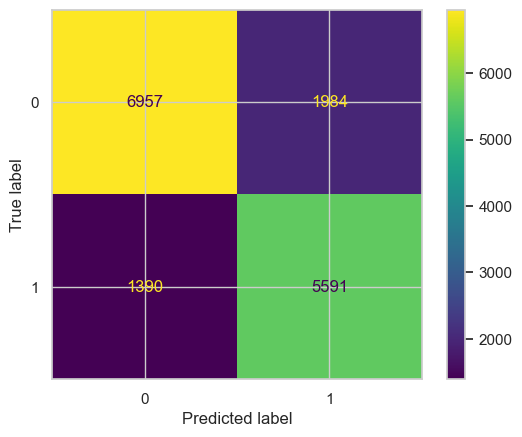

In [150]:
plot_roc_curve(y_val, y_prob)
plot_confusion_matrix(y_val, y_pred_val)

In [151]:
%%time

model=CatBoostClassifier(**catboost_params,verbose=200)
model.fit(X_train,y_train)
y_pred_val = model.predict(X_val)
y_prob=model.predict_proba(X_val)[:, 1]
print("\nClassification Report:\n", classification_report(y_val, y_pred_val))
print("\nArea Under the ROC Curve:\n", roc_auc_score(y_val, y_prob))
Model_scores_after_preprocessing['CatBoostClassifier'] = roc_auc_score(y_val, y_prob)

0:	learn: 0.6537982	total: 25.9ms	remaining: 43.9s
200:	learn: 0.4334353	total: 4s	remaining: 29.8s
400:	learn: 0.4171074	total: 7.9s	remaining: 25.6s
600:	learn: 0.4035659	total: 12.5s	remaining: 22.8s
800:	learn: 0.3911533	total: 16.9s	remaining: 18.9s
1000:	learn: 0.3794801	total: 21.7s	remaining: 15.1s
1200:	learn: 0.3684541	total: 25.8s	remaining: 10.7s
1400:	learn: 0.3586302	total: 30.2s	remaining: 6.45s
1600:	learn: 0.3491576	total: 34.3s	remaining: 2.12s
1699:	learn: 0.3446094	total: 36.6s	remaining: 0us

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      8941
           1       0.74      0.81      0.77      6981

    accuracy                           0.79     15922
   macro avg       0.79      0.79      0.79     15922
weighted avg       0.79      0.79      0.79     15922


Area Under the ROC Curve:
 0.8737584996911344
CPU times: total: 39.5 s
Wall time: 37 s


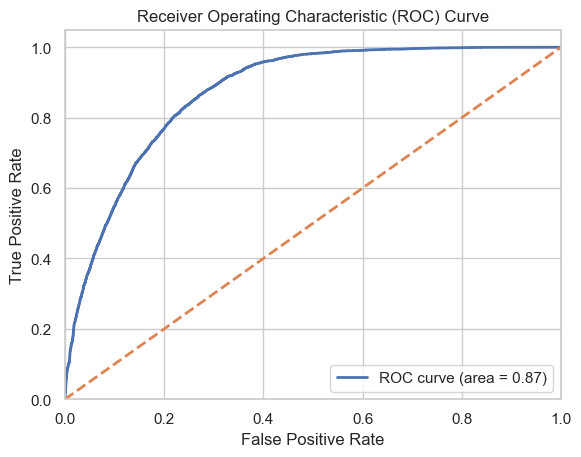

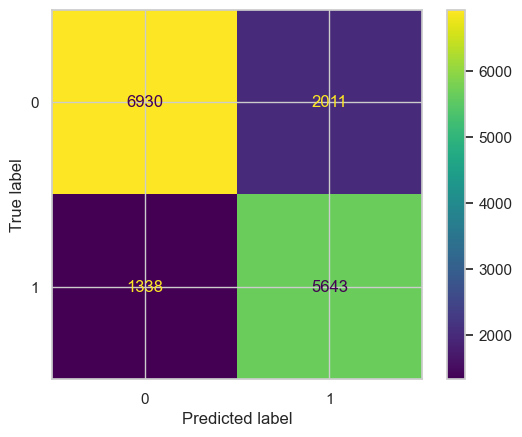

In [152]:
plot_roc_curve(y_val, y_prob)
plot_confusion_matrix(y_val, y_pred_val)

In [153]:
%%time

model=XGBClassifier(**xgb_params)
model.fit(X_train,y_train)
y_pred_val = model.predict(X_val)
y_prob=model.predict_proba(X_val)[:, 1]
print("\nClassification Report:\n", classification_report(y_val, y_pred_val))
print("\nArea Under the ROC Curve:\n", roc_auc_score(y_val, y_prob))
Model_scores_after_preprocessing['XGBClassifier'] = roc_auc_score(y_val, y_prob)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      8941
           1       0.74      0.79      0.76      6981

    accuracy                           0.79     15922
   macro avg       0.78      0.79      0.78     15922
weighted avg       0.79      0.79      0.79     15922


Area Under the ROC Curve:
 0.8689926438612894
CPU times: total: 1min 28s
Wall time: 10.4 s


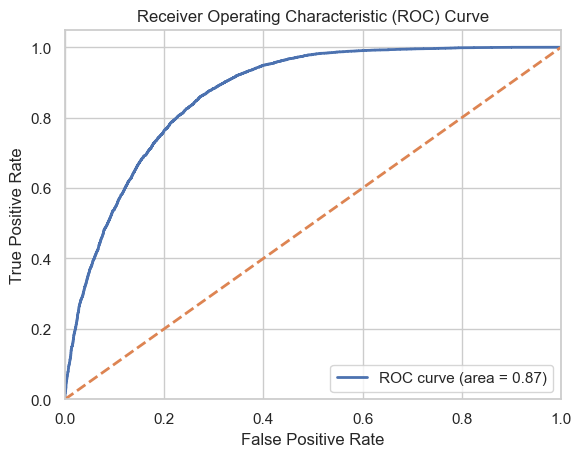

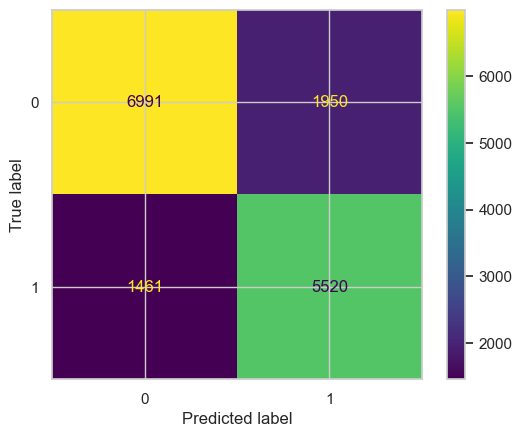

In [154]:
plot_roc_curve(y_val, y_prob)
plot_confusion_matrix(y_val, y_pred_val)

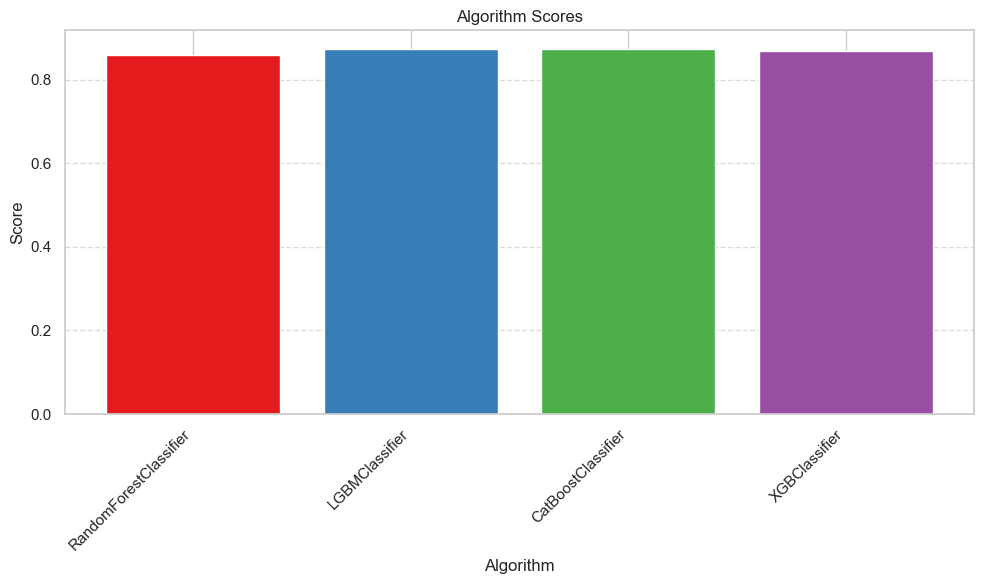

                           Score
Algorithm                       
RandomForestClassifier  0.858117
LGBMClassifier          0.872897
CatBoostClassifier      0.873758
XGBClassifier           0.868993


In [155]:
Show_summary(Model_scores_after_preprocessing)

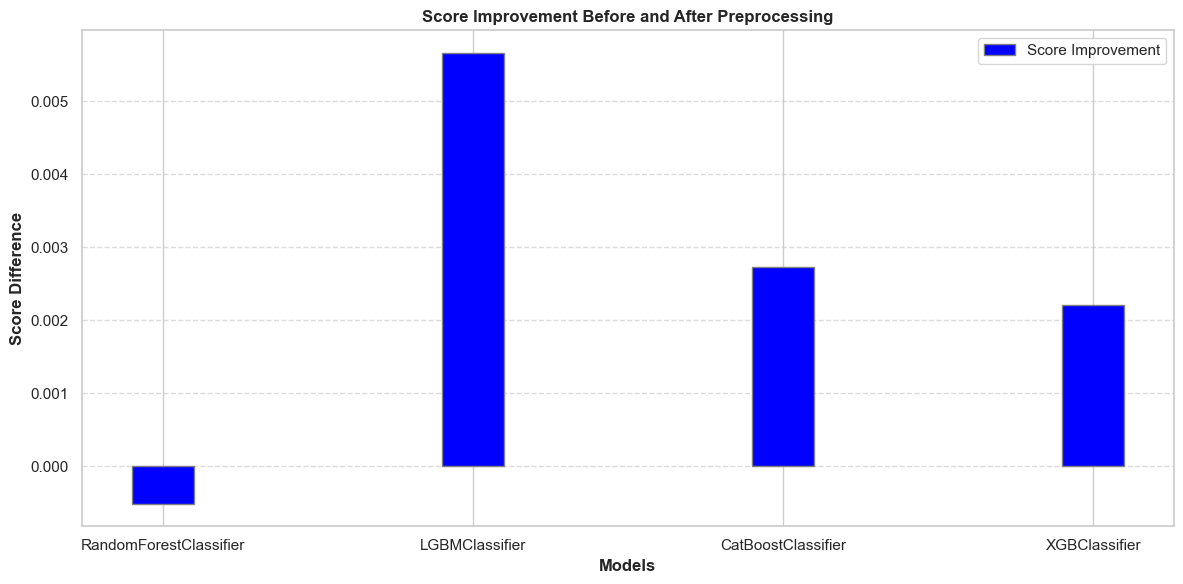

In [156]:
# Extract model names and scores
model_names = list(Model_scores_before_preprocessing.keys())
scores_before = list(Model_scores_before_preprocessing.values())
scores_after = list(Model_scores_after_preprocessing.values())

# Calculate the difference in scores
score_differences = [after - before for before, after in zip(scores_before, scores_after)]

# Set the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
r = np.arange(len(model_names))

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(r, score_differences, color='blue', width=bar_width, edgecolor='grey', label='Score Improvement')

# Add xticks on the middle of the bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Score Difference', fontweight='bold')
plt.xticks([r for r in range(len(model_names))], model_names)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Show plot
plt.title('Score Improvement Before and After Preprocessing', fontweight='bold')
plt.tight_layout()
plt.show()


### Trying to know if there is over fitting or not with other methods

> **We will ensemble the CatBoostClassifier and LGBMClassifier by averaging their results, as they both appear to be the best models based on the previous scores.**

In [167]:
cat_model=CatBoostClassifier(**catboost_params,verbose=0)
lgbm_model=LGBMClassifier(**lgbm_params, verbosity = -1)

> We will use Cross-Validation : techniques like k-fold cross-validation to assess the model's performance on multiple subsets of the data. Cross-validation provides a more reliable estimate of the model's performance and helps me detect overfitting.

In [168]:
%%time 

# Perform cross-validation

# Cat
scores = cross_val_score(cat_model, X, y, cv=5, scoring='roc_auc')
print("CatBoostClassifier : Cross-Validation roc_auc Scores:", scores)

# LGBM
scores = cross_val_score(lgbm_model, X, y, cv=5, scoring='roc_auc')
print("LGBMClassifier : Cross-Validation roc_auc Scores:", scores)

CatBoostClassifier : Cross-Validation roc_auc Scores: [0.86608239 0.86550412 0.86683786 0.86890952 0.86836737]
LGBMClassifier : Cross-Validation roc_auc Scores: [0.86422379 0.8648145  0.86569205 0.86747776 0.86667731]
CPU times: total: 4min 40s
Wall time: 3min 20s


> Ensure that Iam using an appropriate cross-validation strategy, such as stratified k-fold . Stratified k-fold ensures that each fold maintains the same class distribution as the whole dataset.

In [169]:
%%time

# Perform stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cat
scores = cross_val_score(cat_model, X, y, cv=cv, scoring='roc_auc')
print("CatBoostClassifier : Cross-Validation roc_auc Scores:", scores)

# LGBM
scores = cross_val_score(lgbm_model, X, y, cv=cv, scoring='roc_auc')
print("LGBMClassifier : Cross-Validation roc_auc Scores:", scores)

CatBoostClassifier : Cross-Validation roc_auc Scores: [0.8689284  0.86941997 0.86478944 0.86476328 0.86865003]
LGBMClassifier : Cross-Validation roc_auc Scores: [0.86758741 0.86810427 0.86415668 0.86294999 0.86733658]
CPU times: total: 4min 38s
Wall time: 3min 23s


# Now, let's apply our model to unseen data and assess its performance based on the Kaggle score.

In [170]:
sample_submission=pd.read_csv("sample_submission.csv")

In [173]:
cat_model.fit(X,y)
lgbm_model.fit(X,y)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.09, max_depth=7,
               n_estimators=1700, verbosity=-1)

In [175]:
cat_preds=cat_model.predict_proba(test)[:, 1]
lgbm_preds=lgbm_model.predict_proba(test)[:, 1]

In [176]:
# Evaluating the Final Model with the test data
smoking_pred = (cat_preds+lgbm_preds)/2

In [177]:
# Exporting submission data
sample_submission['smoking'] = smoking_pred
sample_submission.to_csv('submission.csv',index = False)

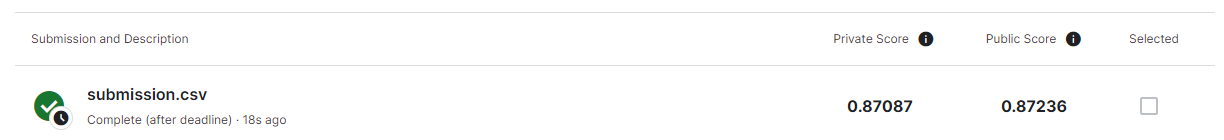